In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.shape

(1984, 5)

In [5]:
df.drop(['Gold Investments', 'Comp Stock', 'Other sharesInvestments'], axis=1,inplace=True)

In [6]:
df.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


In [7]:
df.dropna()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [8]:
df.shape

(1984, 2)

In [9]:
df.dtypes

Date                object
Oil Investments    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1984 non-null   object 
 1   Oil Investments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [11]:
df.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


In [12]:
df.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [13]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [14]:
df.dtypes

Date               datetime64[ns]
Oil Investments           float64
dtype: object

In [15]:
df.set_index('Date',inplace=True)

In [16]:
df.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [17]:
df.tail()

,Oil Investments
Date,
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352
2017-11-14,-0.019376
2017-11-15,-0.007006


In [18]:
import numpy as np 
train_set, test_set= np.split(df, [int(.75 *len(df))])

In [19]:
print(train_set, test_set)

            Oil Investments
Date                       
2009-12-31         0.025417
2010-04-01         0.026830
2010-05-01         0.002699
2010-06-01         0.021688
2010-07-01        -0.006256
...                     ...
2015-11-20        -0.028607
2015-11-23        -0.003046
2015-11-24         0.041253
2015-11-25         0.008070
2015-11-27        -0.015769

[1488 rows x 1 columns]             Oil Investments
Date                       
2015-11-30        -0.003451
2015-01-12         0.003710
2015-02-12        -0.016018
2015-03-12         0.028800
2015-04-12        -0.026290
...                     ...
2017-09-11         0.005984
2017-10-11        -0.007173
2017-11-13         0.000352
2017-11-14        -0.019376
2017-11-15        -0.007006

[496 rows x 1 columns]


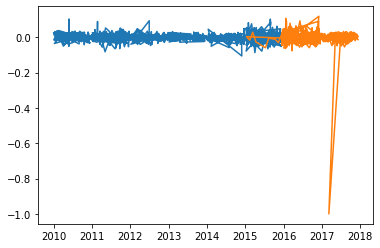

In [20]:
train = df[:1488]
test = df[-496:]
plt.plot(train)
plt.plot(test)

In [21]:
#Check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [22]:
result=adfuller(df['Oil Investments'])

In [23]:
print("The values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used")

The values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used


In [24]:
 #perform dickey fuller test  
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Oil Investments'],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

Results of dickey fuller test
Test Statistics                 -45.942163
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    1983.000000
critical value (1%)              -3.433652
critical value (5%)              -2.862999
critical value (10%)             -2.567547
dtype: float64


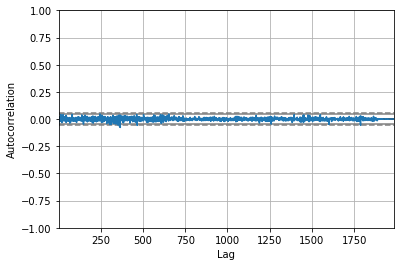

In [25]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(df['Oil Investments'])
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

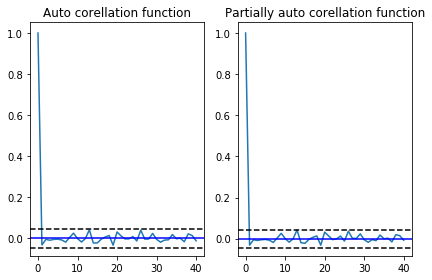

In [27]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df, nlags=40)
pacf= pacf(df, nlags=40,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

In [28]:
import statsmodels.api as sm

In [29]:
model = sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Oil Investments   No. Observations:                 1488
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                3667.398
Date:                            Sat, 31 Oct 2020   AIC                          -7324.795
Time:                                    01:42:18   BIC                          -7298.313
Sample:                                         0   HQIC                         -7314.921
                                           - 1488                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0620      0.017     -3.630      0.000      -0.095      -0.029
ma.L1         -0.9992      0.009   -110.248      0.000      -1.017      -0.981
ar.S.L12      -0.0028      0.024     -0.117      0.907      -0.049       0.044
ma.S.L12      -0.9996      0.222     -4.502      0.000      -1.435      -0.564
sigma2         0.0004   8.25e-05      4.675      0.000       0.000       0.001
===================================================================================
Ljung-Box (Q):                       40.83   Jarque-Bera (JB):               716.30
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

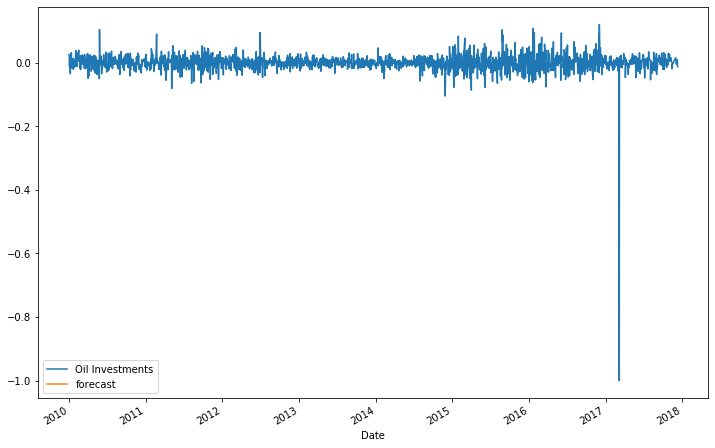

In [31]:
df['forecast']=model_fit.predict(start=2015-11-30,end=2017-11-15,dynamic = True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates= [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [33]:
future_datest_df= pd.DataFrame(index = future_dates [1:], columns=df.columns)

In [34]:
future_datest_df.tail()

,Oil Investments,forecast
2019-06-15,NaN,NaN
2019-07-15,NaN,NaN
2019-08-15,NaN,NaN
2019-09-15,NaN,NaN
2019-10-15,NaN,NaN
